In [1]:
""" Check missing stations from all datasets """

import pandas as pd
import xarray as xr
import os,sys
import numpy as np
import glob
import matplotlib.pyplot as plt
import glob
from multiprocessing import Pool
from functools import partial

""" Create a list of up-to-date missing station files, taken from the harvested files """
harvested_dir = '/raid60/scratch/federico/HARVESTED_JAN2021/'
dirs = ['bufr', 'ncar' , 'era5_1' , 'era5_2' , 'era5_3188' , 'era5_1759' , 'era5_1761' , 'igra2' ]

#a = open('unidentified_station_files.txt' , 'w')
'''
for d in dirs:
    print('Doing ', d)
    for f in os.listdir(harvested_dir + '/' + d):
        if '.nc' not in f:
            continue
        if f[0] == '-':
            if d == 'era5_1':
                name = f.split('_harvested_')[1].replace('.??????','').replace('.txt.gz.nc','')
            else:
                name = f.split('_harvested_')[1].replace('.gz.nc','').replace('.nc','')
            a.write(d + '\t' + name + '\n')
    print('done ' , d )
a.close()
'''
df = pd.read_csv('unidentified_station_files.txt')

In [2]:
df[:10]

,bufr\tera5.10464.bfr
0,bufr\tera5.1075.bfr
1,bufr\tera5.32207.bfr
2,bufr\tera5.10295.bfr
3,bufr\tera5.52707.bfr
4,bufr\tera5.91949.bfr
5,bufr\tera5.10425.bfr
6,bufr\tera5.10483.bfr
7,bufr\tera5.1090.bfr
8,bufr\tera5.1060.bfr
9,bufr\tera5.11500.bfr


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator


Finished analyzing station_configurations files 


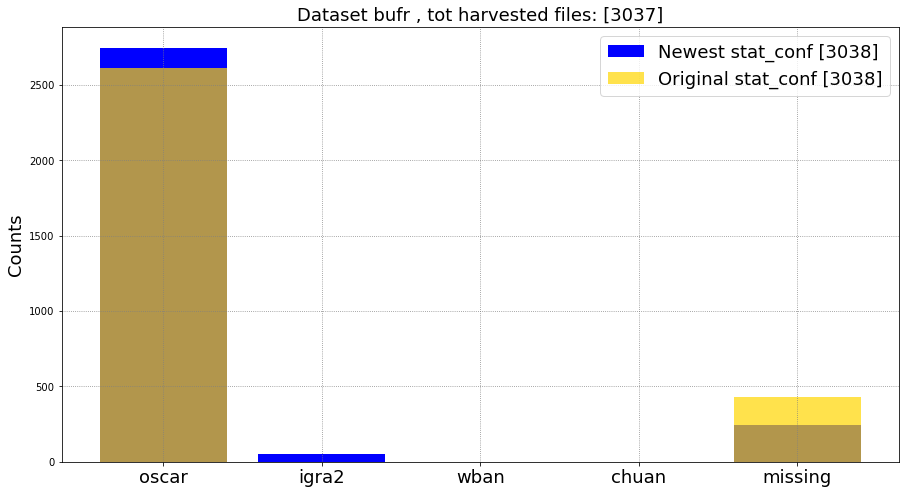

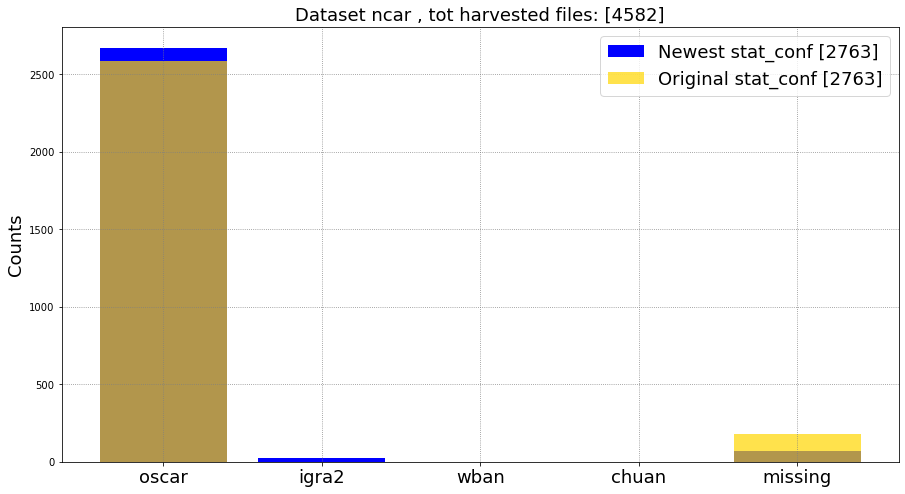

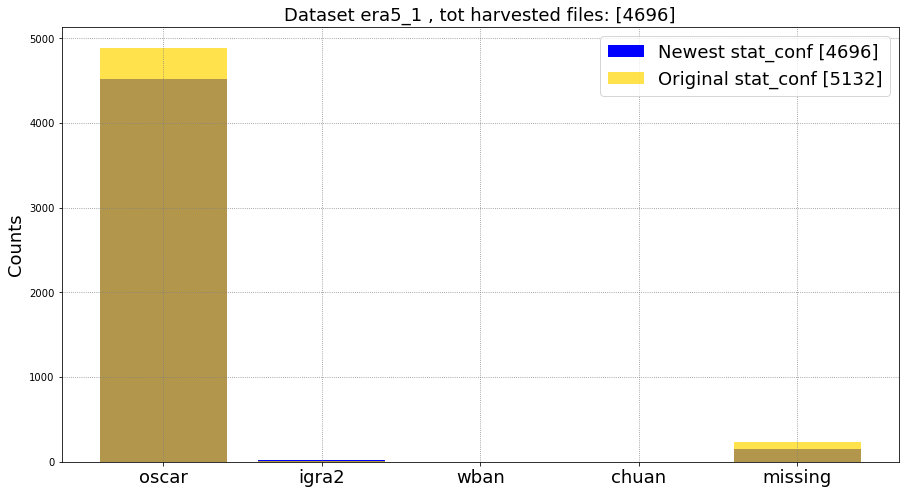

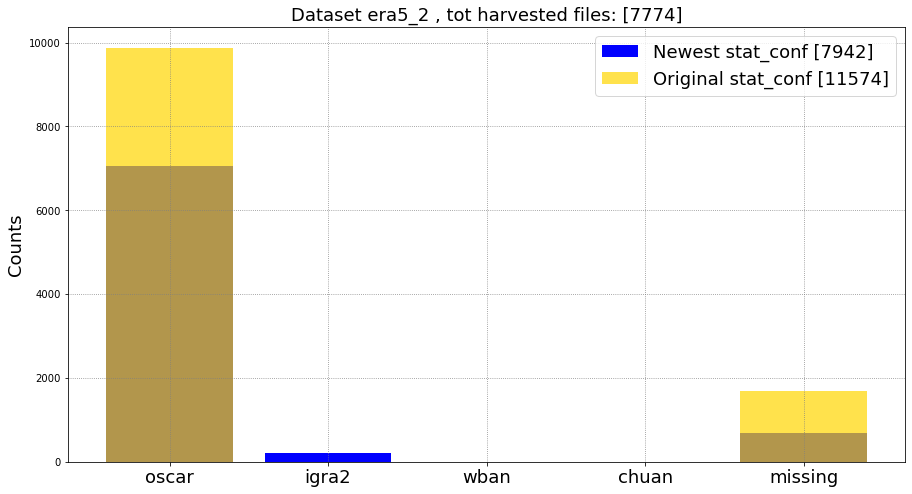

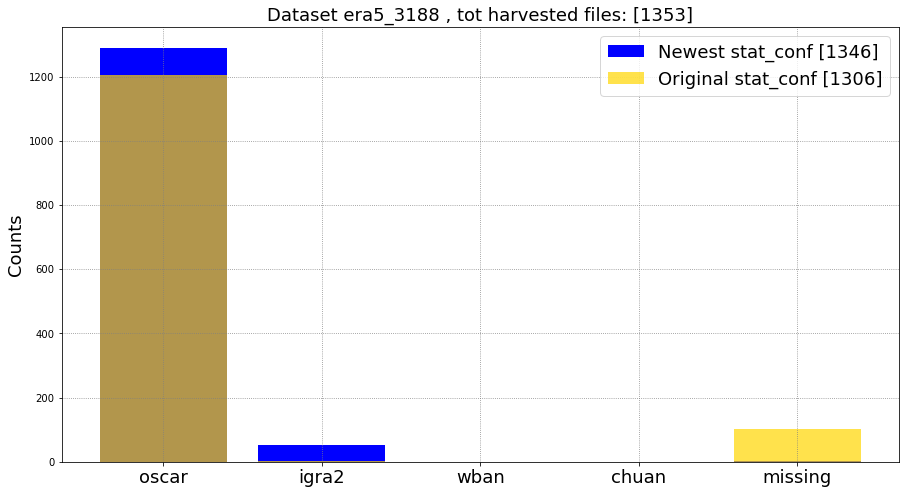

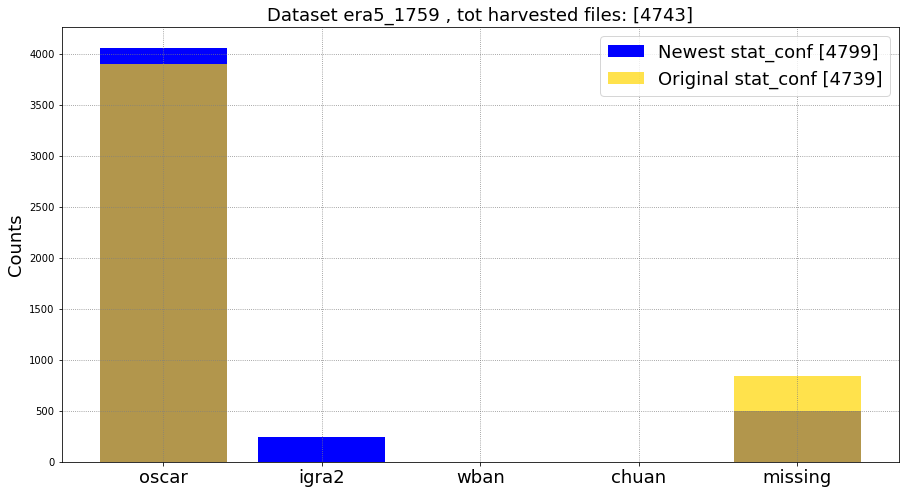

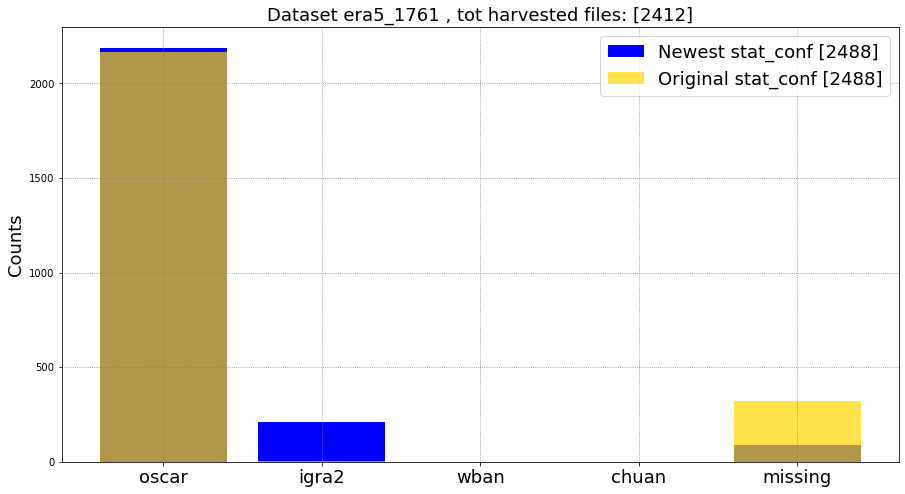

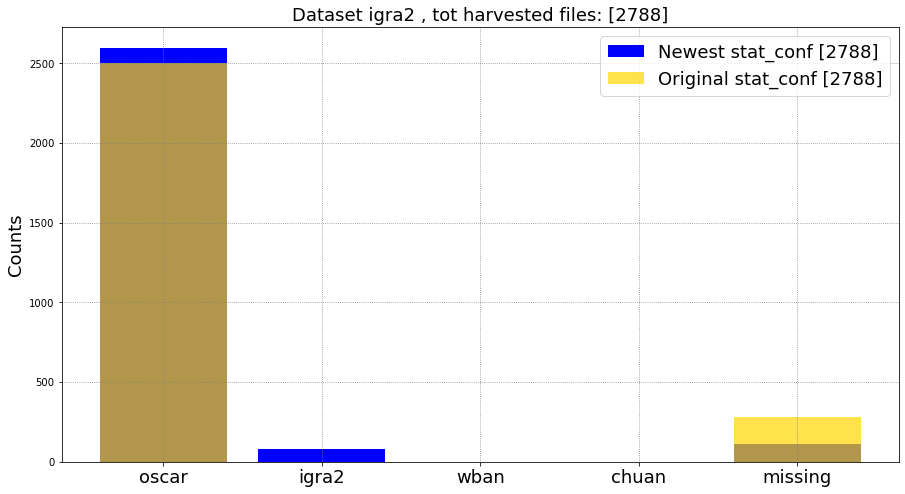

In [3]:
""" Dowload orginal stat_conf file 
Analysing the information containe din old versions of the station_configuration files
that are downloaded from GitHub history """

d = 'raw.githubusercontent.com/MBlaschek/CEUAS/'
os.system('mkdir first_stat_conf' )
F = [d+'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_ncar.dat',
        d+'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_era5_3188.dat',
        d+'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_era5_1761.dat',
        d+'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_era5_1.dat',
        d+'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_bufr.dat',
        d+'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_era5_1759.dat',
        d+'caaaef77338ba3eb726b74d45cdc9adf1dd9ab29/CEUAS/public/harvest/data/station_configurations/station_configuration_era5_2.dat' ,
        d + 'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_igra2.dat' ]

for f in F:
   os.system('wget -P old_stat_conf ' + f )
    

""" Copy most up-to-date stat_conf files """
os.system ('cp -r /raid8/srvx1/federico/GitHub/CEUAS_master_JANUARY2021/CEUAS/CEUAS/public/harvest/data/station_configurations new_stat_conf')        

def count(df):
    oscar, igra2, wban, chuan, missing = 0,0,0,0,0
    pids = list (df['primary_id'].astype(str) )
    
    for p in pids:
        if p[0] == '-' or  '[' in p :  # possibile missing stat identifier 
            missing += 1 
            #print('missing ' , p )
        elif '-2000' in p:
            oscar += 1
        elif '-20300':
            igra2 += 1
        elif '-20400':
            wban += 1
        elif '-20500':
            chuan += 1      
        else: 
            print('oscar' , p)
            oscar += 1
            
    return oscar, igra2, wban, chuan, missing
    

dirs = ['bufr', 'ncar' , 'era5_1' , 'era5_2' , 'era5_3188' , 'era5_1759' , 'era5_1761' , 'igra2']

for d in dirs:
    name = 'station_configuration_' + d + '.dat'
    new = pd.read_csv( 'new_stat_conf' + '/' + name , sep = '\t'  )
    old   = pd.read_csv( 'old_stat_conf' + '/' + name , sep = '\t'  )
    
    oscar, igra2, wban, chuan, missing = count(new)
    y_n = [oscar, igra2, wban, chuan, missing]
    
    oscar, igra2, wban, chuan, missing = count(old)
    y_o = [oscar, igra2, wban, chuan, missing]
    
    x = [1,2,3,4,5]
    

    fs = 18
    fig, ax = plt.subplots(figsize=(15,8))
    labels = ['', 'oscar', 'igra2', 'wban', 'chuan', 'missing']
    ax.set_xticklabels(labels, fontsize = fs)
    
    harvested_files = str( len ( [ f for f in os.listdir(harvested_dir + '/' + d) if '_harvested_' in f ] ) )
    
    plt.bar(x, y_n , color= 'blue', label = 'Newest stat_conf [' + str(sum(y_n)) + ']')
    plt.bar(x, y_o , color= 'gold' , label = 'Original stat_conf [' + str(sum(y_o)) + ']', alpha = 0.7)
    plt.legend( fontsize = fs)
    plt.title ('Dataset ' + d + ' , tot harvested files: [' + harvested_files + ']' , fontsize = fs )
    plt.ylabel('Counts' , fontsize = fs)
    os.system ('mkdir Plots_stat_conf' )
    plt.grid(ls = ':' , color = 'gray')
    #plt.show()
    plt.savefig('Plots_stat_conf/bars_' + d + '.png' , dpi = 200 )
    
 

print('Finished analyzing station_configurations files ')

In [4]:
files = glob.glob('/raid60/scratch/leo/scratch/era5/odbs/1/era5.conv._*')
print(len(files))

4697


In [11]:
missing_files = {}
for d in dirs:
    missing_files[d] = []
    for f in os.listdir(harvested_dir + '/' + d):
        path = harvested_dir + '/' + d + '/' + f 
        if '.nc' not in f:
            continue
        if f[0] == '-':   
            missing_files[d].append(path)
            
 
print('Done reading missing files *** ')
def analyze_missing_station_records(path):
    try:
        #print('Doing' , path)
        sc = xr.open_dataset(path , engine = 'h5netcdf' , group = 'station_configuration' , decode_times = False )
        lat, lon = sc['latitude'].values[0],  sc['longitude'].values[0]
        if lon > 180:
            lon = lon - 360
        size = os.path.getsize(path) / 10**6 
    
        ts = xr.open_dataset(path , engine = 'h5netcdf' , decode_times = True )['recordtimestamp'][:].values
        min_date, max_date = min(ts), max (ts)
        #print(path)        
        return [lat, lon, size, min_date, max_date, len(ts)]
    
    except:
        pass
        #print('Failing ' , path )
        #return [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan ]
    
    
    
    
func=partial(analyze_missing_station_records)
p=Pool(40)    
missing_data = {}

#files = missing_files['bufr'][:10]
#missing_data=p.map(func,files)
#missing_data=p.map(func,f)

#for fi,num in zip(files, range(len(files)) ) :
 #   a = analyze_missing_station_records(fi)
    
print(1)

for k in missing_files.keys():
    missing_data[k] = {}
    files = missing_files[k]
    #missing_data=list(p.map(func,f))
    data=p.map(func,files)
    for i,v in zip([0,1,2,3,4,5] , ['lat',  'lon', 'size', 'min_date', 'max_date', 'records' ] ):
        values = [v for v in data if v ]
        missing_data[k][v] = [ p[i] for p in values  ]
    print('Exracted data')
    
    

In [14]:
""" To plot:
- locations of unidentfied stations
- distribution of size (MB) of files
- distribution of number of records
"""
def plot_stations(data):
    import shapely
    from shapely.geometry import Point, Polygon    
    import geopandas as gpd
    
    out_dir = 'Missing_ids'
    os.system('mkdir Plots')
    os.system('mkdir Plots/' + out_dir)
    
    """ Getting the WMO regions json file """
    WMO_json = 'WMO_regions.json'
    if not os.path.isfile(WMO_json):
        os.system( 'wget https://cpdb.wmo.int/js/json/WMO_regions.json --no-check-certificate ')

    WMO =  gpd.read_file('WMO_regions.json')
    

    #clb=f.colorbar(c,ax=ax,orientation='horizontal')                                                                                                                                                                                                                                     
    #clb.ax.set_title('{:6.4f}'.format(np.mean(ds[k]).values/43200)+' '+units)                                                                                                                                                                                                            

    """ Loading from geopandas built-in methods """
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
    world = world.plot()
    WMO.plot( ax=world,  facecolor="none", edgecolor="lightgray", lw = 0.8)

    for d in data.keys():
        world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
        world = world.plot()
        WMO.plot( ax=world,  facecolor="none", edgecolor="lightgray", lw = 0.8)
        
        lat, lon, records= data[d]['lat'] , data[d]['lon'], data[d]['records']
        
        plotto = plt.scatter( lon, lat , c= records,  s = 0.7, cmap='rainbow' )
        cbar = plt.colorbar(fraction=0.03, pad=0.03) # pad moves bar to left-right, fractions is the length of the bar
        cbar.set_label('Number of Records ')

        num = len ([r for r in records if r > 100 ])
        plt.title ('Dataset: ' + d + ' , ' + str(num) + ' stations with >100 records', fontsize = 12)
        plt.xlim([-180.,180.])
        plt.ylim([-90.,90.])
        #plt.legend(loc = 'lower left', fontsize = 6 ,ncol = 2)
        plt.show()
        plt.savefig('Plots/' + out_dir + '/MissingId_location_' +d +  '.png', dpi= 250,   bbox_inches = 'tight' )
        print('Processed database ' , d )
        plt.close()

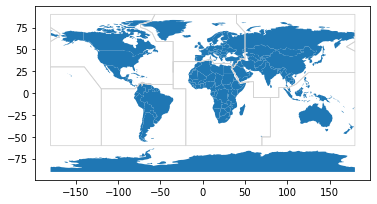

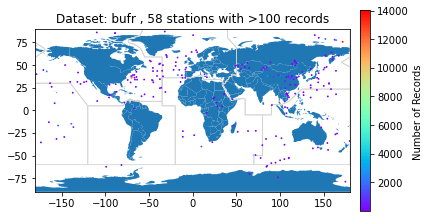

Processed database  bufr


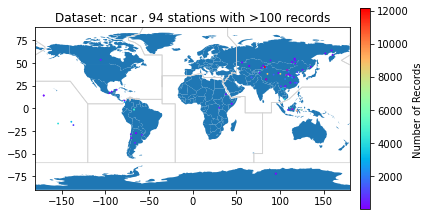

Processed database  ncar


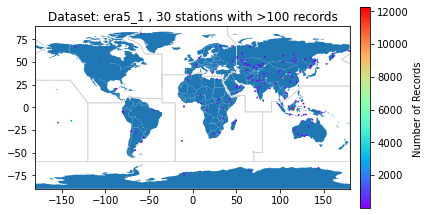

Processed database  era5_1


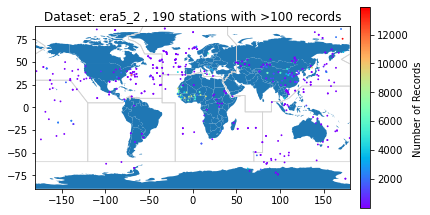

Processed database  era5_2


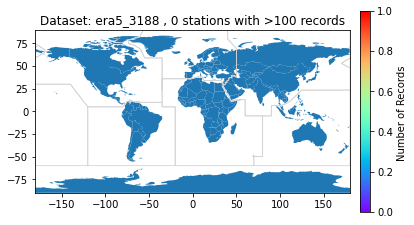

Processed database  era5_3188


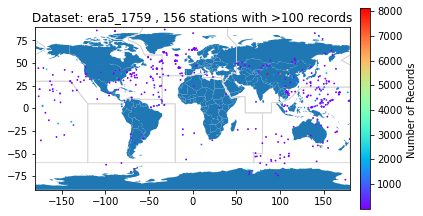

Processed database  era5_1759


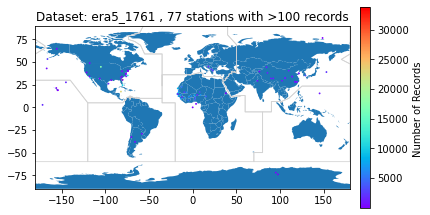

Processed database  era5_1761


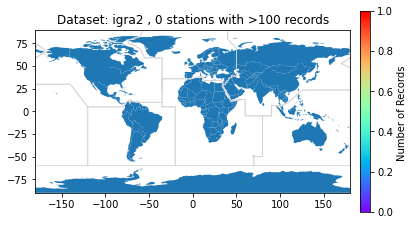

Processed database  igra2


In [15]:
dummy = plot_stations(missing_data)